In [53]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data_stroke_ok.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467 entries, 0 to 5466
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5467 non-null   int64  
 1   gender             5467 non-null   int64  
 2   age                5467 non-null   float64
 3   hypertension       5467 non-null   int64  
 4   heart_disease      5467 non-null   int64  
 5   ever_married       5467 non-null   int64  
 6   work_type          5467 non-null   int64  
 7   residence_type     5467 non-null   int64  
 8   avg_glucose_level  5467 non-null   float64
 9   bmi                5467 non-null   float64
 10  smoking_status     5467 non-null   int64  
 11  stroke             5467 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 512.7 KB


In [4]:
data.sample(5)

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3214,177,1,3.0,1,0,1,1,1,0.0,2.0,2,1
243,1283,1,2.0,1,1,1,0,0,1.0,4.0,2,0
1759,922,0,0.0,0,0,0,2,0,0.0,0.0,1,0
4355,6179,0,3.0,0,0,1,0,0,0.0,1.0,1,1
4535,6359,1,3.0,0,0,1,0,0,0.0,1.0,2,1


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
X = data.drop(['Unnamed: 0','stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,0,2.0,1,0,1,0,0,0.0,1.0,0
1,1,2.0,0,1,1,1,0,0.0,2.0,3
2,0,1.0,0,0,1,1,0,1.0,4.0,3
3,1,3.0,0,0,1,0,1,0.0,2.0,2
4,1,0.0,0,0,0,2,0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
5462,0,3.0,0,0,1,0,1,0.0,1.0,1
5463,1,3.0,0,0,1,0,1,2.0,3.0,1
5464,1,3.0,0,0,1,0,1,0.0,2.0,0
5465,0,3.0,0,0,1,0,0,2.0,4.0,1


In [7]:
y = data['stroke']
y

0       0
1       0
2       0
3       0
4       0
       ..
5462    1
5463    1
5464    1
5465    1
5466    1
Name: stroke, Length: 5467, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 train_size=0.8,
                                                 shuffle=True,
                                                random_state=42)

print("Tổng số mẫu trong tập dữ liệu: ",len(y))
print("Tổng số mẫu trên tập Train: ",len(y_train))
print("Tổng số mẫu trên tập Test: ",len(y_test))

Tổng số mẫu trong tập dữ liệu:  5467
Tổng số mẫu trên tập Train:  4373
Tổng số mẫu trên tập Test:  1094


In [287]:
rf = RandomForestClassifier(n_estimators=400,
                           random_state=42)

In [289]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=42)

In [290]:
rf.score(X_train,y_train)

0.9158472444546079

In [292]:
y_pred = rf.predict(X_test)
print("Độ chính xác (Accuracy) trên tập Test:", accuracy_score(y_test, y_pred))
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))
print("\nBáo cáo chi tiết (Classification Report):\n", classification_report(y_test, y_pred))

Độ chính xác (Accuracy) trên tập Test: 0.856489945155393

Ma trận nhầm lẫn (Confusion Matrix):
 [[519  94]
 [ 63 418]]

Báo cáo chi tiết (Classification Report):
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       613
           1       0.82      0.87      0.84       481

    accuracy                           0.86      1094
   macro avg       0.85      0.86      0.86      1094
weighted avg       0.86      0.86      0.86      1094



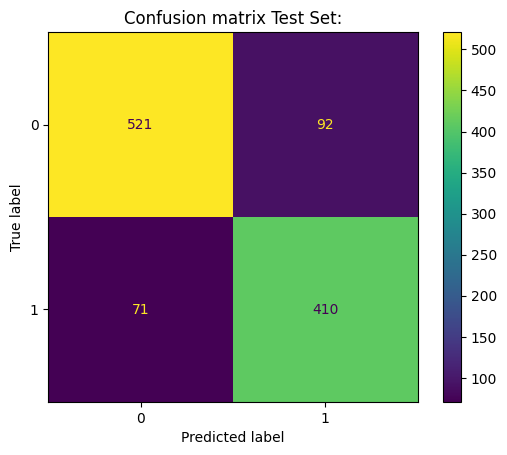

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_matrix_rf = confusion_matrix(y_test,y_pred)

#Hiển thị ma trận:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix Test Set:')
plt.show()

In [253]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier(
    n_estimators=500,       # số lượng cây
    max_depth=15,            # độ sâu mỗi cây
    learning_rate=0.05,      # tốc độ học (bước cập nhật)
    subsample=1,          # tỷ lệ mẫu dùng mỗi cây (giúp tránh overfitting)
    colsample_bytree=0.8,   # tỷ lệ đặc trưng dùng mỗi cây
    random_state=42,
    eval_metric='logloss',  # chỉ số đánh giá nội bộ
    use_label_encoder=False
)

# Huấn luyện mô hình (chỉ trên tập train đã cân bằng)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [254]:
xgb_model.score(X_train,y_train)

0.9151612165561399

In [255]:
y_pre2 = xgb_model.predict(X_test)

In [256]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pre2))
print("\n📘 Classification Report:\n", classification_report(y_test, y_pre2))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pre2))

🎯 Accuracy: 0.8619744058500914

📘 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       613
           1       0.83      0.86      0.85       481

    accuracy                           0.86      1094
   macro avg       0.86      0.86      0.86      1094
weighted avg       0.86      0.86      0.86      1094


🧩 Confusion Matrix:
 [[528  85]
 [ 66 415]]
